In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# move directory
import os
colab_dir = "./drive/MyDrive/"
os.chdir(colab_dir)

In [54]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline

In [55]:
# pip install
##  pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip    
from pandas_profiling import ProfileReport

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [56]:
# set random seed
import random
random.seed(335)

In [57]:
# magic word
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [58]:
# for better viz
import pprint
import warnings
warnings.filterwarnings('ignore')

### reference
-------------------

- [pandas cheat sheet](https://github.com/pandas-dev/pandas/tree/master/doc/cheatsheet)
- [numpy cheat sheet(data camp)](https://www.datacamp.com/community/blog/python-numpy-cheat-sheet)
- [scikit-learn cheat sheet(data camp)](datacamp.com/community/blog/scikit-learn-cheat-sheet)

# data understanding
------------
The data understanding phase starts with an initial data collection and proceeds withactivities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data or to detect interesting subsets to form hypothesesfor hidden information.

## collect initial data
----------

### task

Acquire within the project the data (or access to the data) listed in the
project resources. This initial collection includes data loading if necessary
for data understanding. For example, if you apply a specific tool for data
understanding, it makes perfect sense to load your data into this tool.
This effort possibly leads to initial data preparation steps.

Note: if you acquire multiple data sources, integration is an additional
issue, either here or in the later data preparation phase.

### output

List the dataset (or datasets) acquired, together with their locations
within the project, the methods used to acquire them and any problems
encountered. Record problems encountered and any solutions achieved
to aid with future replication of this project or with the execution of
similar future projects.

In [ ]:
# read csv file
df = pd.read_csv(path + file_name)

In [59]:
# read excel file
df = pd.read_excel('Online Retail.xlsx')

## describe data
----------

### task

Examine the “gross” or “surface” properties of the acquired data and
report on the results.

### output

Describe the data which has been acquired, including: the format of
the data, the quantity of data, for example number of records and fields
in each table, the identities of the fields and any other surface features
of the data which have been discovered. Does the data acquired satisfy
the relevant requirements?

In [60]:
# number of records and fields
df.shape # (records, fields)

(541909, 8)

In [61]:
# head
df.head(n=5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [62]:
# tail
df.tail(n=5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [63]:
# data types
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## explore data
----------

### task

This task tackles the data mining questions, which can be addressed
using querying, visualization and reporting. These include: distribution
of key attributes, for example the target attribute of a prediction task;
relations between pairs or small numbers of attributes; results of
simple aggregations; properties of significant sub-populations; simple
statistical analyses. These analyses may address directly the data mining goals; they may also contribute to or refine the data description
and quality reports and feed into the transformation and other data
preparation needed for further analysis.

### output

Describe results of this task including first findings or initial hypothesis and their impact on the remainder of the project. If appropriate,
include graphs and plots, which indicate data characteristics or lead
to interesting data subsets for further examination.

In [64]:
# convert data type
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format='%Y/%m/%d')
df.UnitPrice = df.UnitPrice.astype('int64')
df.Quantity = df.Quantity.astype('int64')

In [65]:
# describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.053874,15287.690570
std,218.081158,96.760354,1713.600303
min,-80995.000000,-11062.000000,12346.000000
25%,1.000000,1.000000,13953.000000
50%,3.000000,2.000000,15152.000000
75%,10.000000,4.000000,16791.000000
max,80995.000000,38970.000000,18287.000000


<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

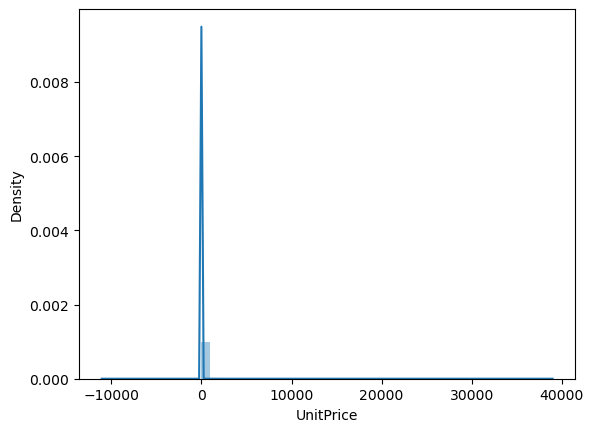

In [66]:
# histogram
sns.distplot(df.UnitPrice)

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

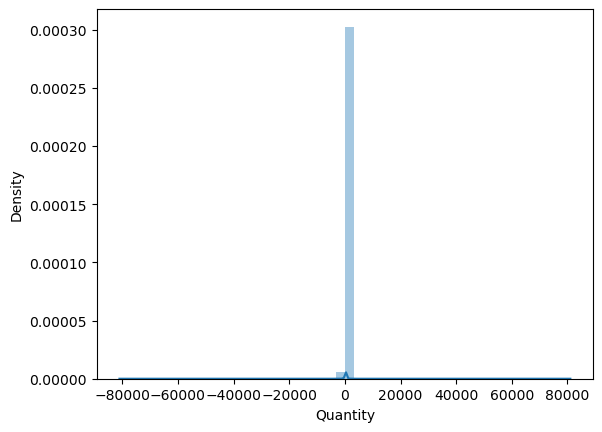

In [67]:
# histogram
sns.distplot(df.Quantity)

<AxesSubplot:xlabel='InvoiceDate', ylabel='UnitPrice'>

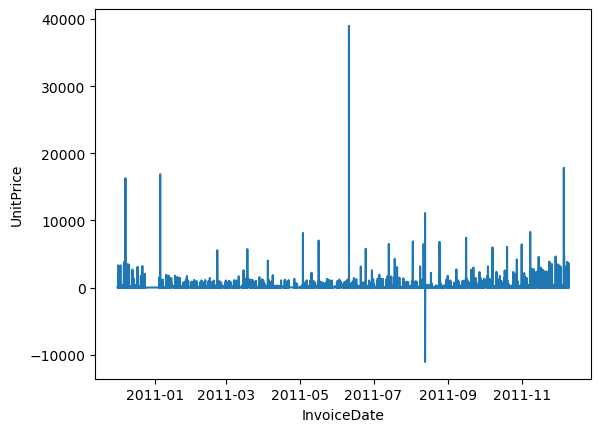

In [68]:
# random data wrangling
data = df.groupby('InvoiceDate', as_index=False).agg({'UnitPrice': np.sum, 'Quantity': np.sum})
sns.lineplot(data=data, x="InvoiceDate", y="UnitPrice")

In [69]:
# pandas profiling
profile = ProfileReport(df, minimal=True)
profile.to_file( "data_understanding_report.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## verify data quality
----------

### task

Examine the quality of the data, addressing questions such as: is the
data complete (does it cover all the cases required)? Is it correct or
does it contain errors and if there are errors how common are they?
Are there missing values in the data? If so how are they represented,
where do they occur and how common are they?

### output

List the results of the data quality verification; if quality problems
exist, list possible solutions. Solutions to data quality problems
generally depend heavily on both data and business knowledge.

In [70]:
# check duplicate row
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2,14446.0,United Kingdom


In [71]:
# check outlier
from scipy import stats
z_thr = 3.0
df[(np.abs(stats.zscore(df.select_dtypes(include=int))) > z_thr).any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569,NaN,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607,NaN,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0,15838.0,United Kingdom
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0,16754.0,United Kingdom
...,...,...,...,...,...,...,...,...
540071,581459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0,17949.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2,16446.0,United Kingdom
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933,NaN,United Kingdom


In [72]:
# check missing data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# check number of unique value
df.nunique()

## note/questions
-------------

#### collect initial data


#### describe data



#### explore data



#### verify data quality




In [ ]:
pip install -U sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')


#Sentences are encoded by calling model.encode()
description_embeddings = model.encode(df.Description)
